# Autoencoders in Tensorflow

## For each one of the datasets MNIST, 20NG, SPAMBASE, FASHION, run TF as an autoencoder with a desired hidden layer size (try K=5,10, 20, 100, 200- what is the smaleest K that works?). Verify the obtained reencoding of data (the new feature representation) in several ways: 
repeat a classification train/test task , or a clustering taks
examine the new pairwise distances dist(i,j) agains the old distances obtained with original features (sample 100 pairs of related words)
examine the top 20 neighbours (by new distance) set overlap with old neighbours, per datapoint
for images, rebuild the image form output layer and draw to look at it

### MNIST 

In [44]:
%matplotlib inline

In [45]:
import tensorflow as tf
import numpy as np 
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors

In [46]:
# Import data
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

# One hot encoding of response variable
mnist_hot  = OneHotEncoder().fit_transform(mnist.target.reshape(-1,1))

mnist_data = mnist.data/255.0

In [47]:
mnist_train, mnist_test, mnist_y_train, mnist_y_test = train_test_split(mnist_data, mnist.target, test_size = 0.3, random_state = 42)

In [48]:
def display_digit(digit):
    """ 
    Function to check and plot a 784x1 vector, representing a digit as an image
    """
    
    image = digit
    plt.figure()
    fig = plt.imshow(image.reshape(28,28))
    fig.set_cmap('gray_r')
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    plt.show()

Epoch:  0  loss:  0.40627864
Epoch:  1000  loss:  0.044734903
Epoch:  2000  loss:  0.034372833
Epoch:  3000  loss:  0.031008083
Epoch:  4000  loss:  0.028648451
Epoch:  5000  loss:  0.02677902
Epoch:  6000  loss:  0.02420633
Epoch:  7000  loss:  0.023533313
Epoch:  8000  loss:  0.023150226
Epoch:  9000  loss:  0.021687983


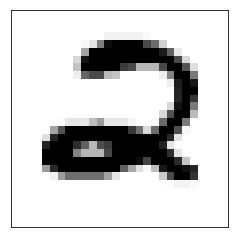

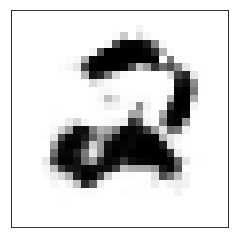

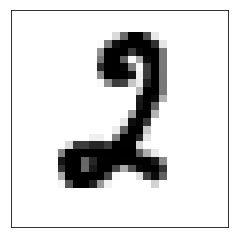

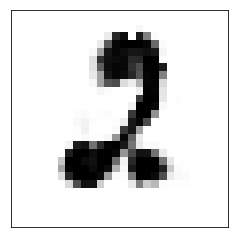

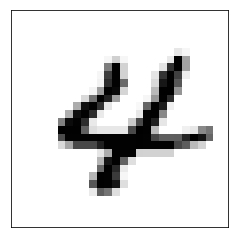

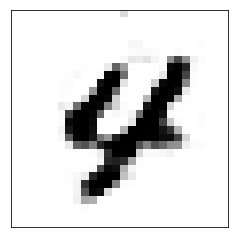

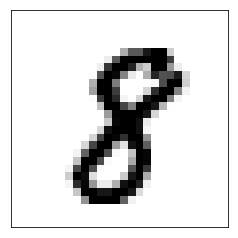

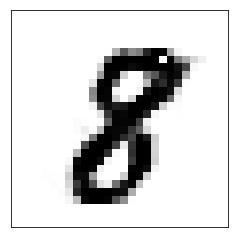

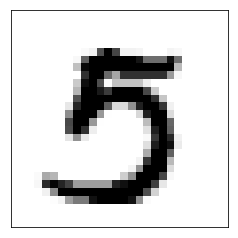

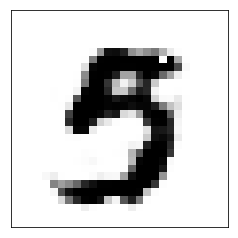

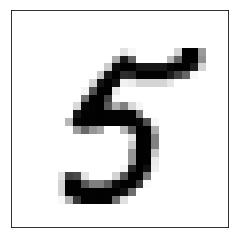

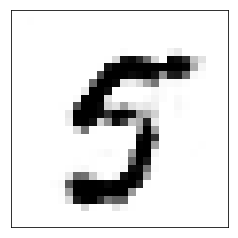

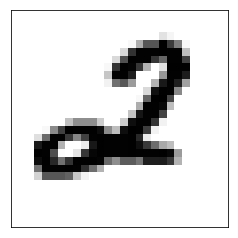

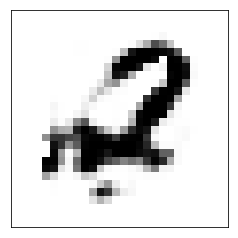

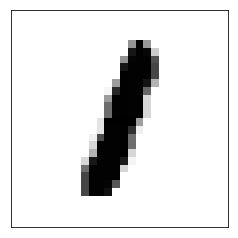

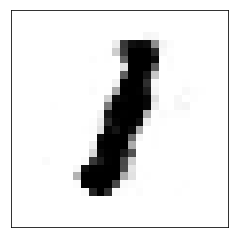

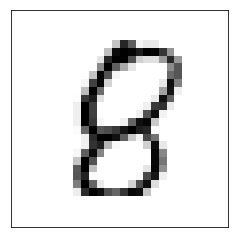

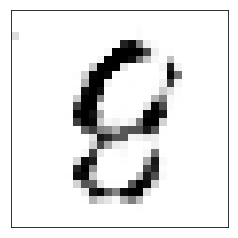

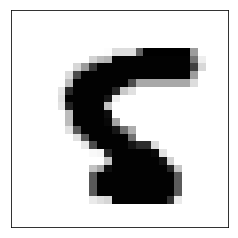

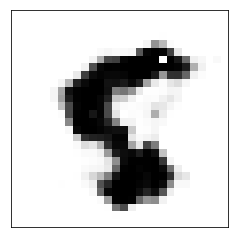

In [49]:
# Construct neural network
# Constants
x_mnist = tf.placeholder(tf.float32, [None, 784])
batch_size = 350


# Layers
n_hidden = 100
weights = {
    'encode_h1': tf.Variable(tf.random_normal([784, n_hidden])),
    'decode_h1': tf.Variable(tf.random_normal([n_hidden, 784]))
}

biases = {
    'encode_b1': tf.Variable(tf.random_normal([n_hidden])),
    'decode_b1': tf.Variable(tf.random_normal([784]))
}

def encoder(X):
    return tf.nn.sigmoid(tf.add(tf.matmul(X,weights['encode_h1']), biases['encode_b1']))
def decoder(X):
    return tf.nn.sigmoid(tf.add(tf.matmul(X,weights['decode_h1']), biases['decode_b1']))

# Now build by calling function

layer_1 = encoder(x_mnist)
layer_2 = decoder(layer_1)

# Now the optimizers

y_pred = layer_2
y_true = x_mnist


idx = np.random.randint(mnist_data.shape[0], size = 10)
mnist_10 = mnist_data[idx, :]
# cost = tf.reduce_mean(tf))


cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate = 0.05).minimize(cost)
hm_epochs = 10000
# Start session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    mark = 0
    for epoch in range(hm_epochs):
        _, c = sess.run([optimizer, cost], feed_dict = {x_mnist:mnist_data[mark:mark + batch_size]})
        mark += batch_size
        if mark >= 70000: mark = 0
        # if math.isnan(c): print (epoch)
        if epoch%1000 == 0: print('Epoch: ', epoch,' loss: ', c)
#         print('Epoch: ', epoch,' loss: ', c)
        
    d_mnist = sess.run([layer_2], feed_dict = {x_mnist: mnist_data})
    
    
    for num,i in enumerate(idx):
        display_digit(mnist_data[i])
        display_digit(d_mnist[0][i])

In [50]:
d_mnist_train, d_mnist_test, d_mnist_y_train, d_mnist_y_test = train_test_split(d_mnist[0], mnist.target, test_size = 0.3, random_state = 42)

In [51]:
mnist_data.shape

(70000, 784)

In [52]:
mnist_logreg_o = LogisticRegression(penalty='l2')
mnist_logreg_d = LogisticRegression(penalty='l2')
mnist_logreg_o.fit(mnist_train, mnist_y_train)
mnist_logreg_d.fit(d_mnist_train, d_mnist_y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
print('Classification accuracy on original dataset: ',mnist_logreg_o.score(mnist_train, mnist_y_train))

Classification accuracy on original dataset:  0.9284489795918367


In [53]:
print('Classification accuracy on reencoded dataset: ', mnist_logreg_d.score(d_mnist_train, d_mnist_y_train))

Classification accuracy on reencoded dataset:  0.8999591836734694


In [14]:
# KNN classification
mnist_knn1 = NearestNeighbors(n_neighbors=20)
mnist_knn1.fit(mnist_data)
mnist_knn2 = NearestNeighbors(n_neighbors=20)
mnist_knn2.fit(d_mnist[0])

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=20, p=2, radius=1.0)

In [23]:
len(mnist_knn2.kneighbors(d_mnist[0][7].reshape(1,-1))[1][0])

20

In [14]:
np.sum(c==d)

3

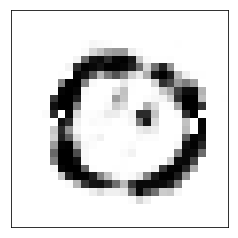

In [15]:
display_digit(d_mnist[0][60356])

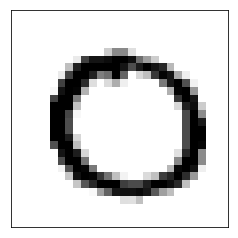

In [16]:
display_digit(mnist_data[60356])

### FASHION

In [5]:
import mnist_reader

In [6]:
fashion_train, fashion_y_train = mnist_reader.load_mnist('data/fashion', kind='train')
fashion_test, fashion_y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [7]:
# One hot encoding of output
fashion_y_train_oh = OneHotEncoder().fit_transform(fashion_y_train.reshape(-1,1))
fashion_y_test_oh = OneHotEncoder().fit_transform(fashion_y_test.reshape(-1,1))

In [8]:
fashion_train = fashion_train/255.0
fashion_test = fashion_test/255.0

In [9]:
fashion_tr, fashion_ts, fashion_tr_y, fashion_ts_y = train_test_split(fashion_train, fashion_y_train,\
                                                                     test_size = 0.3, random_state = 42)

Epoch:  0  loss:  0.37498456
Epoch:  1000  loss:  0.06270004
Epoch:  2000  loss:  0.05115906
Epoch:  3000  loss:  0.043969978
Epoch:  4000  loss:  0.046114065
Epoch:  5000  loss:  0.045668304
Epoch:  6000  loss:  0.043454602
Epoch:  7000  loss:  0.03988208
Epoch:  8000  loss:  0.04315088
Epoch:  9000  loss:  0.041364897


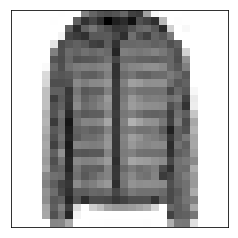

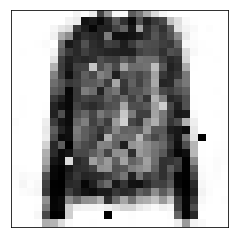

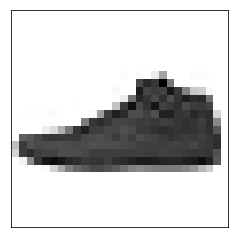

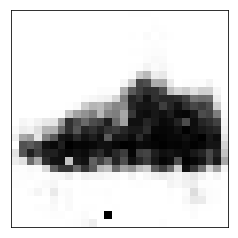

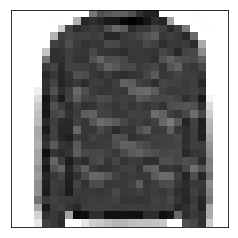

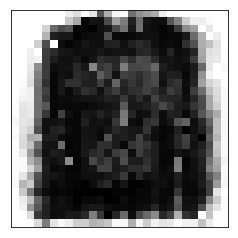

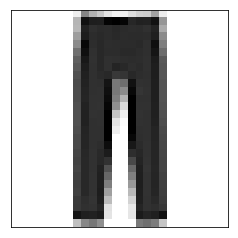

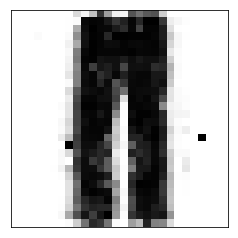

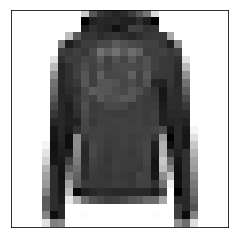

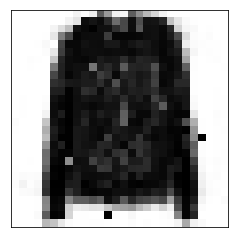

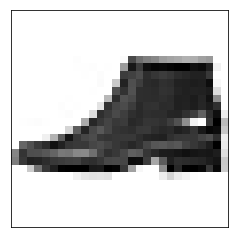

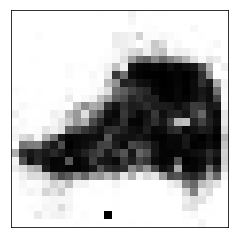

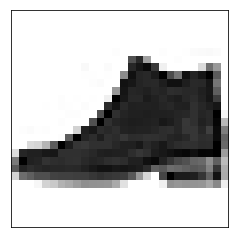

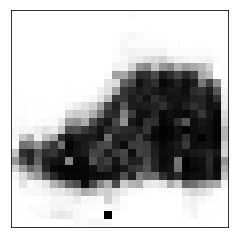

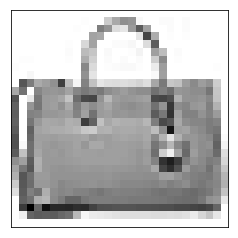

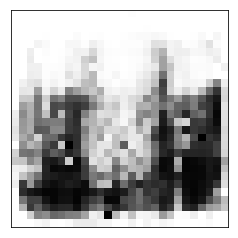

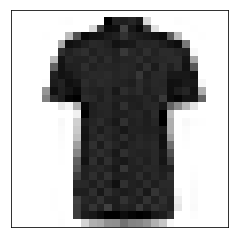

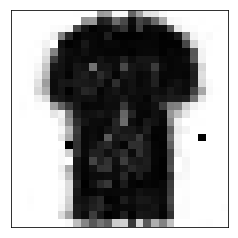

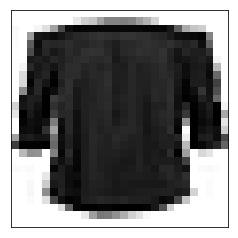

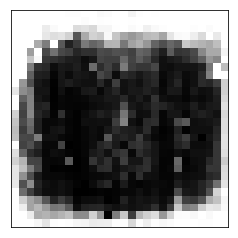

In [10]:
# Construct neural network
# Constants
x_fashion = tf.placeholder(tf.float32, [None, 784])
batch_size = 350


# Layers
n_hidden = 100
weights = {
    'encode_h1': tf.Variable(tf.random_normal([784, n_hidden])),
    'decode_h1': tf.Variable(tf.random_normal([n_hidden, 784]))
}

biases = {
    'encode_b1': tf.Variable(tf.random_normal([n_hidden])),
    'decode_b1': tf.Variable(tf.random_normal([784]))
}

def encoder(X):
    return tf.nn.sigmoid(tf.add(tf.matmul(X,weights['encode_h1']), biases['encode_b1']))
def decoder(X):
    return tf.nn.sigmoid(tf.add(tf.matmul(X,weights['decode_h1']), biases['decode_b1']))

# Now build by calling function

layer_1 = encoder(x_fashion)
layer_2 = decoder(layer_1)

# Now the optimizers

y_pred = layer_2
y_true = x_fashion


idx = np.random.randint(fashion_train.shape[0], size = 10)
# cost = tf.reduce_mean(tf))


cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate = 0.05).minimize(cost)
hm_epochs = 10000
# Start session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    mark = 0
    for epoch in range(hm_epochs):
        _, c = sess.run([optimizer, cost], feed_dict = {x_fashion:fashion_train[mark:mark + batch_size]})
        mark += batch_size
        if mark >= 70000: mark = 0
        # if math.isnan(c): print (epoch)
        if epoch%1000 == 0: print('Epoch: ', epoch,' loss: ', c)
#         print('Epoch: ', epoch,' loss: ', c)
        
    d_fashion = sess.run([layer_2], feed_dict = {x_fashion: fashion_train})
    
    
    for num,i in enumerate(idx):
        display_digit(fashion_train[i])
        display_digit(d_fashion[0][i])

In [14]:
d_fashion_tr, d_fashion_ts, d_fashion_tr_y, d_fashion_ts_y = train_test_split(d_fashion[0], fashion_y_train,\
                                                                     test_size = 0.3, random_state = 42)

In [13]:
d_fashion[0].shape

(60000, 784)

In [15]:
fashion_logreg_o = LogisticRegression(penalty='l2')
fashion_logreg_d = LogisticRegression(penalty='l2')
fashion_logreg_o.fit(fashion_tr, fashion_tr_y)
fashion_logreg_d.fit(d_fashion_tr, d_fashion_tr_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
print('Classification accuracy on original dataset: ', fashion_logreg_o.score(fashion_tr, fashion_tr_y))

Classification accuracy on original dataset:  0.8760476190476191


In [17]:
print('Classification accuracy on reencoded dataset: ', fashion_logreg_d.score(d_fashion_tr, d_fashion_tr_y))

Classification accuracy on original dataset:  0.8173095238095238


In [22]:
# KNN classification
fashion_knn1 = NearestNeighbors(n_neighbors=20)
fashion_knn1.fit(fashion_train)
fashion_knn2 = NearestNeighbors(n_neighbors=20)
fashion_knn2.fit(d_fashion[0])

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=1, n_neighbors=20, p=2, radius=1.0)

In [23]:
a = np.unique(fashion_knn1.kneighbors(fashion_train[7].reshape(1,-1))[1])

In [24]:
b = np.unique(fashion_knn2.kneighbors(d_fashion[0][7].reshape(1,-1))[1])

### 20 NEWSGROUP 

In [18]:
from sklearn.datasets import fetch_20newsgroups
ng_train = fetch_20newsgroups(subset = 'train')          # 11,314 datapoints in .data and category targets in .target_names
ng_test = fetch_20newsgroups(subset = 'test')

# use nltk's stopwords to reduce matrix dimensions
import nltk
from nltk.corpus import stopwords
stopw = list(set(stopwords.words('english')))

# Convert to tf-idf vector
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_20ng_class = TfidfVectorizer(stop_words=stopw)
tfidf_20ng_train = tfidf_20ng_class.fit_transform(ng_train.data)
tfidf_20ng_test = tfidf_20ng_class.fit_transform(ng_test.data)

In [19]:
# One hot encoding of vectors
train_800_y = OneHotEncoder().fit_transform(ng_train.target.reshape(-1,1))

In [20]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
import numpy as np

In [21]:
bychi_800 = SelectKBest(chi2, 800)
new_train_800 = bychi_800.fit_transform(tfidf_20ng_train, ng_train.target)

In [30]:
new_train_800

<11314x800 sparse matrix of type '<class 'numpy.float64'>'
	with 88371 stored elements in Compressed Sparse Row format>

In [22]:
x_20ng = tf.placeholder(tf.float32, [None, 800])
n_hidden = 100

weights = {
    'encode_h1': tf.Variable(tf.random_normal([800, n_hidden])),
    'decode_h1': tf.Variable(tf.random_normal([n_hidden, 800]))
}

biases = {
    'encode_b1': tf.Variable(tf.random_normal([n_hidden])),
    'decode_b1': tf.Variable(tf.random_normal([800]))
}

def encoder(X):
    return tf.add(tf.matmul(X, weights['encode_h1']), biases['encode_b1'])
    
def decoder(X):
    return tf.add(tf.matmul(X, weights['decode_h1']), biases['decode_b1'])

layer_1 = encoder(x_20ng)
layer_2 = decoder(layer_1)

y_pred = layer_2
y_true = x_20ng


idx = np.random.randint(new_train_800.shape[0], size = 100)

learning_rate = 0.01
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate = learning_rate).minimize(cost)

hm_epochs = 10000
# Start session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    mark = 0
    for epoch in range(hm_epochs):
        _, c = sess.run([optimizer, cost], feed_dict = {x_20ng:new_train_800[mark:mark + batch_size].todense()})
        mark += batch_size
        if mark >= new_train_800.shape[0]: mark = 0
        if epoch%1000 == 0: print('Epoch: ', epoch,' loss: ', c)
        
    d_20ng = sess.run([layer_2], feed_dict = {x_20ng: new_train_800.todense()})
    
    
    # Run classification task and see if neighboring distances are similar
    ng_knn1 = NearestNeighbors(n_neighbors=20)
    ng_knn1.fit(new_train_800)
    ng_knn2 = NearestNeighbors(n_neighbors=20)
    ng_knn2.fit(d_20ng[0])
    
    for i in idx:
        print('For element ',i, ': ')

        a_1 = ng_train.target[ng_knn1.kneighbors(new_train_800[i])[1]]
        b_1 = ng_train.target[ng_knn2.kneighbors(d_20ng[0][i].reshape(1,-1))[1]]
        print(a_1)
        print(b_1)
        print(np.sum(a_1 == b_1))

Epoch:  0  loss:  98.387146
Epoch:  1000  loss:  0.010999052
Epoch:  2000  loss:  0.0036945078
Epoch:  3000  loss:  0.001957722
Epoch:  4000  loss:  0.0014639021
Epoch:  5000  loss:  0.0007290954
Epoch:  6000  loss:  0.00044683326
Epoch:  7000  loss:  0.00051747327
Epoch:  8000  loss:  0.00027293604
Epoch:  9000  loss:  0.0002433105
For element  8289 : 
[[ 8  8  8  8  6  8  8  8  6 13  1 19 16 13  7 14 13 13 13 12]]
[[ 8  8  8  8  6  7  6 10  8  6 13  4 13 18  1 19 18  7  7  8]]
5
For element  7167 : 
[[ 7  3 12 12  4 18 12 12 16 13 12 11  1  1 16  3  6  9 12 19]]
[[ 7 18 12  4 12 12  3 12  2 19 16 16  3 12 13 12  9 13  9  1]]
3
For element  10882 : 
[[11 11  7 14  5 12  4  7  2  3 13  4  3 12  3 12  1 11 18  4]]
[[11 11 14  4  7  7  5  6 14 12  4  3 18  4  7  1  5  5 11  3]]
2
For element  4652 : 
[[ 4  4  4 12  4  4  1  6  1  4  6  4  4  8  4  4 12  4  4  4]]
[[ 4  4  4  4  4  4  6 12  1  1  8  4  4  4  4  4  6  4  1  6]]
11
For element  4680 : 
[[11 11 11 11  5 11 11 11  5 11 11  4 

[[12  3 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12  6]]
[[12 12  3 12 12 12 12 12 12 12 12 12 12 13  1 12 12 12  1 12]]
14
For element  7607 : 
[[8 8 8 8 8 8 8 8 8 8 7 8 8 8 8 7 8 8 7 8]]
[[8 8 8 8 8 8 8 8 8 7 8 8 8 8 7 7 8 8 7 8]]
17
For element  1611 : 
[[ 7  7  7  7  7  7  7 12  7  7  7  7  8  7 10  7  7  6  7  7]]
[[7 7 7 7 7 7 7 7 7 7 7 7 7 8 6 7 7 7 7 7]]
15
For element  4823 : 
[[ 9  9  9  9  9  9  9  9  9  9  9  9  9  1  9  9  9  9  9 10]]
[[ 9  9  9  9  9 10  4 10  9  9  9 19  9  1  9 10  9  9  9  9]]
14
For element  6366 : 
[[ 2 13 19 19  6 13 12 19  3  2 13 14 11 14 14 13 14 16 14  2]]
[[ 2 19 13  6 19 19  3 13 12 14  2 11 14 14 14  9 14 14 14 11]]
5
For element  5230 : 
[[ 1  1  1 14  1  1  1  5 11  5  2  5 12  2 13  2  6 13  2  5]]
[[ 1  1  1  1 11 14  1  5  1  2  5  4 15  4 14 12  1  9 12 13]]
5
For element  648 : 
[[0 0 0 0 0 0 0 0 0 6 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
19
For element  8694 : 
[[14 14 14 14 12 14 14 14 14 14 14 12 1

In [24]:
ng20_logreg = LogisticRegression(multi_class='multinomial', penalty = 'l2', solver = 'saga', tol = 0.1)
ng20_logreg_d = LogisticRegression(multi_class='multinomial', penalty = 'l2', solver = 'saga', tol = 0.1)
ng20_logreg.fit(tfidf_20ng_train, ng_train.target)
ng20_logreg_d.fit(d_20ng[0], ng_train.target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='saga',
          tol=0.1, verbose=0, warm_start=False)

In [27]:
print('Classification accuracy on original dataset: ', ng20_logreg.score(tfidf_20ng_train, ng_train.target))

Classification accuracy on original dataset:  0.9727770903305639


In [28]:
print('Classification accuracy on reencoded dataset: ', ng20_logreg_d.score(d_20ng[0], ng_train.target))

Classification accuracy on decoded dataset:  0.6170231571504331


### SPAMBASE

In [29]:
fname = 'spambase.data'
spambase_data_list = []
for line in open(fname):
    spambase_data_list.append(np.array(line.strip().split(','),  dtype = 'float32'))

spambase_data = np.array(spambase_data_list)

spambase_data_feats = spambase_data[:,:-1]
spambase_data_labels = spambase_data[:,-1]

In [30]:
spambase_labels = OneHotEncoder().fit_transform(spambase_data_labels.reshape(-1,1))

In [31]:
spambase_data_feats.shape

(4601, 57)

In [33]:
x_spam = tf.placeholder(tf.float32, [None, 57])
n_hidden = 100

weights = {
    'encode_h1': tf.Variable(tf.random_normal([57, n_hidden])),
    'decode_h1': tf.Variable(tf.random_normal([n_hidden, 57]))
}

biases = {
    'encode_b1': tf.Variable(tf.random_normal([n_hidden])),
    'decode_b1': tf.Variable(tf.random_normal([57]))
}

def encoder(X):
    return tf.add(tf.matmul(X, weights['encode_h1']), biases['encode_b1'])
    
def decoder(X):
    return tf.add(tf.matmul(X, weights['decode_h1']), biases['decode_b1'])

layer_1 = encoder(x_spam)
layer_2 = decoder(layer_1)

y_pred = layer_2
y_true = x_spam


idx = np.random.randint(spambase_data_feats.shape[0], size = 100)

learning_rate = 0.001
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate = learning_rate).minimize(cost)

hm_epochs = 10000
# Start session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    mark = 0
    for epoch in range(hm_epochs):
        _, c = sess.run([optimizer, cost], feed_dict = {x_spam:spambase_data_feats[mark:mark + batch_size]})
        mark += batch_size
        if mark >= spambase_data_feats.shape[0]: mark = 0
        # if math.isnan(c): print (epoch)
        if epoch%1000 == 0: print('Epoch: ', epoch,' loss: ', c)
#         print('Epoch: ', epoch,' loss: ', c)
        
    d_spam = sess.run([layer_2], feed_dict = {x_spam: spambase_data_feats})
    
    
#     # Run classification task and see if neighboring distances are similar
#     spam_knn1 = NearestNeighbors(n_neighbors=20)
#     spam_knn1.fit(spambase_data_feats)
#     spam_knn2 = NearestNeighbors(n_neighbors=20)
#     spam_knn2.fit(d_spam[0])
    
#     correctness = []
#     for i in idx:
#         print('For element ',i, ': ')

#         a_1 = spambase_data_labels[ng_knn1.kneighbors(spambase_data_feats[i].reshape(1,-1))[1]]
#         b_1 = spambase_data_labels[ng_knn2.kneighbors(d_spam[0][i].reshape(1,-1))[1]]
#         print(a_1)
#         print(b_1)
#         correctness.append(np.sum(a_1 == b_1))
    
#     plt.hist(correctness)
#     print('For element 1000: ')
    
#     a_2 = ng_train.target[ng_knn1.kneighbors(new_train_800[1000])[1]]
#     b_2 = ng_train.target[ng_knn2.kneighbors(d_20ng[0][1000].reshape(1,-1))[1]]
#     print(a_2)
#     print(b_2)
#     print(np.sum(a_2 == b_2))
    
#     print('For element 7000: ')
    
#     a_3 = ng_train.target[ng_knn1.kneighbors(new_train_800[7000])[1]]
#     b_3 = ng_train.target[ng_knn2.kneighbors(d_20ng[0][7000].reshape(1,-1))[1]]
#     print(a_3)
#     print(b_3)
#     print(np.sum(a_3 == b_3))

Epoch:  0  loss:  51414616.0
Epoch:  1000  loss:  1496.6255
Epoch:  2000  loss:  354.5515
Epoch:  3000  loss:  9337.663
Epoch:  4000  loss:  57.400238
Epoch:  5000  loss:  1383.7296
Epoch:  6000  loss:  52.999287
Epoch:  7000  loss:  342.3675
Epoch:  8000  loss:  304.0853
Epoch:  9000  loss:  23.50967


For element  2111 : 
20
For element  461 : 
18
For element  2564 : 
18
For element  1738 : 
13
For element  1503 : 
14
For element  3083 : 
20
For element  805 : 
13
For element  2519 : 
20
For element  231 : 
13
For element  2011 : 
17
For element  1042 : 
20
For element  244 : 
17
For element  3467 : 
9
For element  3838 : 
17
For element  3222 : 
20
For element  707 : 
16
For element  4369 : 
17
For element  2690 : 
11
For element  1990 : 
14
For element  687 : 
17
For element  3829 : 
19
For element  1796 : 
12
For element  67 : 
20
For element  170 : 
16
For element  2647 : 
18
For element  1134 : 
8
For element  917 : 
17
For element  2724 : 
16
For element  1185 : 
11
For element  1749 : 
18
For element  4595 : 
19
For element  2751 : 
20
For element  4563 : 
15
For element  1611 : 
20
For element  2244 : 
12
For element  707 : 
16
For element  4274 : 
18
For element  2595 : 
16
For element  1803 : 
14
For element  565 : 
12
For element  4456 : 
18
For element  378 : 
14
For ele

(array([ 1.,  0.,  2.,  5.,  7., 13.,  9., 15., 21., 27.]),
 array([ 3. ,  4.7,  6.4,  8.1,  9.8, 11.5, 13.2, 14.9, 16.6, 18.3, 20. ]),
 <a list of 10 Patch objects>)

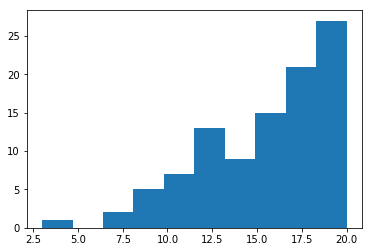

In [42]:
idx = np.random.randint(spambase_data_feats.shape[0], size = 100)
# Run classification task and see if neighboring distances are similar
spam_knn1 = NearestNeighbors(n_neighbors=20)
spam_knn1.fit(spambase_data_feats)
spam_knn2 = NearestNeighbors(n_neighbors=20)
spam_knn2.fit(d_spam[0])

correctness = []
for i in idx:
    print('For element ',i, ': ')

    a_1 = spambase_data_labels[spam_knn1.kneighbors(spambase_data_feats[i].reshape(1,-1))[1]]
    b_1 = spambase_data_labels[spam_knn2.kneighbors(d_spam[0][i].reshape(1,-1))[1]]
#     print(a_1)
#     print(b_1)
    print(np.sum(a_1 == b_1))
    correctness.append(np.sum(a_1 == b_1))

plt.hist(correctness)

In [35]:
spam_logreg = LogisticRegression(multi_class='multinomial', penalty = 'l2', solver = 'saga', tol = 0.1)
spam_logreg_d = LogisticRegression(multi_class='multinomial', penalty = 'l2', solver = 'saga', tol = 0.1)
spam_logreg.fit(spambase_data_feats, spambase_data_labels)
spam_logreg_d.fit(d_spam[0], spambase_data_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='saga',
          tol=0.1, verbose=0, warm_start=False)

In [38]:
print('Classification accuracy on original dataset: ', spam_logreg.score(spambase_data_feats, spambase_data_labels))

Classification accuracy on original dataset:  0.41251901760486853


In [39]:
print('Classification accuracy on reencoded dataset: ', spam_logreg_d.score(d_spam[0], spambase_data_labels))

Classification accuracy on decoded dataset:  0.4344707672245164
